(c_attributes)=
 
# Attributes & Indexing  

```{figure} ../_static/c_data_types/dataframe.svg
:name: vector properties 
Structure of a `GeoDataFrame` extends the functionality of a Pandas `DataFrame`
```

Each `GeoSeries` can contain any geometry type (e.g. points, lines, polygon) and has a `GeoSeries.crs` attribute, which stores information on the projection (CRS stands for Coordinate Reference System). Therefore, each `GeoSeries` in a `GeoDataFrame` can be in a different projection, allowing you to have, for example, multiple versions of the same geometry, just in a different CRS.


```{tip}  Becuase GeoPandas are so intertwined spend the time to learn more about here [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
```

## Create Attributes

One of the most basic operations is creating new attributes. Let's say for instance we want to look at the world population in millions. We can start with an existing column of data `pop_est`. Let's start by looking at the column names:

In [2]:
import geopandas
world = geopandas.read_file(r"../../pygis/data/110m_cultural.zip")
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

We can then do basic operations on the basis of column names. Here we create a new column `m_pop_est`:

In [3]:
# Check for population-related columns
import geopandas

world = geopandas.read_file(r"../../pygis/data/110m_cultural.zip")

# Look for population columns
pop_columns = [col for col in world.columns if 'pop' in col.lower() or 'est' in col.lower()]
print("Population-related columns:", pop_columns)

# Show all columns to find the right one
print("\nAll columns:")
for i, col in enumerate(world.columns):
    print(f"{i:2d}: {col}")

Population-related columns: ['POP_EST', 'POP_RANK', 'POP_YEAR']

All columns:
 0: featurecla
 1: scalerank
 2: LABELRANK
 3: SOVEREIGNT
 4: SOV_A3
 5: ADM0_DIF
 6: LEVEL
 7: TYPE
 8: TLC
 9: ADMIN
10: ADM0_A3
11: GEOU_DIF
12: GEOUNIT
13: GU_A3
14: SU_DIF
15: SUBUNIT
16: SU_A3
17: BRK_DIFF
18: NAME
19: NAME_LONG
20: BRK_A3
21: BRK_NAME
22: BRK_GROUP
23: ABBREV
24: POSTAL
25: FORMAL_EN
26: FORMAL_FR
27: NAME_CIAWF
28: NOTE_ADM0
29: NOTE_BRK
30: NAME_SORT
31: NAME_ALT
32: MAPCOLOR7
33: MAPCOLOR8
34: MAPCOLOR9
35: MAPCOLOR13
36: POP_EST
37: POP_RANK
38: POP_YEAR
39: GDP_MD
40: GDP_YEAR
41: ECONOMY
42: INCOME_GRP
43: FIPS_10
44: ISO_A2
45: ISO_A2_EH
46: ISO_A3
47: ISO_A3_EH
48: ISO_N3
49: ISO_N3_EH
50: UN_A3
51: WB_A2
52: WB_A3
53: WOE_ID
54: WOE_ID_EH
55: WOE_NOTE
56: ADM0_ISO
57: ADM0_DIFF
58: ADM0_TLC
59: ADM0_A3_US
60: ADM0_A3_FR
61: ADM0_A3_RU
62: ADM0_A3_ES
63: ADM0_A3_CN
64: ADM0_A3_TW
65: ADM0_A3_IN
66: ADM0_A3_NP
67: ADM0_A3_PK
68: ADM0_A3_DE
69: ADM0_A3_GB
70: ADM0_A3_BR
71: ADM0_

In [4]:
# Create the population in millions column
world['m_pop_est'] = world['POP_EST'] / 1e6

# Display the results
print(world[['NAME', 'POP_EST', 'm_pop_est']].head())

                       NAME      POP_EST   m_pop_est
0                      Fiji     889953.0    0.889953
1                  Tanzania   58005463.0   58.005463
2                 W. Sahara     603253.0    0.603253
3                    Canada   37589262.0   37.589262
4  United States of America  328239523.0  328.239523


------------------------


## Indexing and Selecting Data

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with .loc and integer position based indexing with .iloc, which apply to both GeoSeries and GeoDataFrame objects. For more information on indexing/selecting, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html).


### Selection by Index Position¶
 
Pandas provides a suite of methods in order to get purely integer based indexing. The semantics follow closely Python and NumPy slicing. These are 0-based indexing. When slicing, the start bound is included, while the upper bound is excluded.  For instance `name = 'fudge'` with `name[0:3]` returns `'fud'`, where f is at 0 and g is at the 3 position with the upper bound excluded.

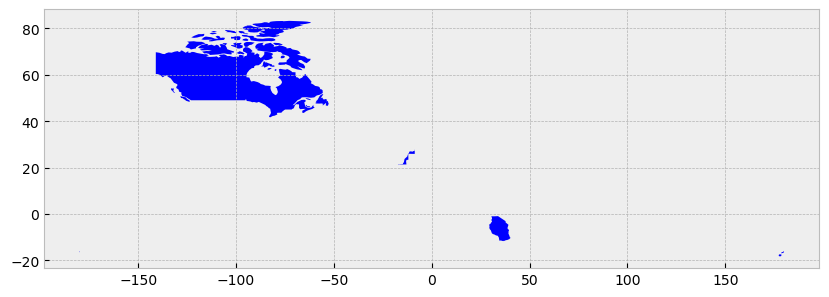

In [6]:
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

world = geopandas.read_file(r"../../pygis/data/110m_cultural.zip")
northern_world = world.iloc[ 0:4 ]    
northern_world.plot(figsize=(10,5))  
plt.show()

**Different choices for indexing**

Object selection has had a number of user-requested additions in order to
support more explicit location based indexing.  

```{panels}

* ``.loc`` is primarily label based, but may also be used with a boolean array. ``.loc`` will raise ``KeyError`` when the items are not found. Allowed inputs are:

    * A single label, e.g. ``5`` or ``'a'`` (Note that ``5`` is interpreted as a
      *label* of the index. This use is **not** an integer position along the
      index.).
    * A list or array of labels ``['a', 'b', 'c']``.
    * A slice object with labels ``'a':'f'`` (Note that contrary to usual Python
      slices, **both** the start and the stop are included, when present in the
      index! See [Slicing with labels](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-slicing-with-labels) 
      and [Endpoints are inclusive](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-endpoints-are-inclusive) 
    * A boolean array (any ``NA`` values will be treated as ``False``).
    * A ``callable`` function with one argument (the calling Series or DataFrame) and
      that returns valid output for indexing (one of the above).

  See more at [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

------------

* ``.iloc`` is primarily integer position based (from ``0`` to
  ``length-1`` of the axis), but may also be used with a boolean
  array.  ``.iloc`` will raise ``IndexError`` if a requested
  indexer is out-of-bounds, except *slice* indexers which allow
  out-of-bounds indexing.  (this conforms with Python/NumPy *slice*
  semantics).  Allowed inputs are:

    * An integer e.g. ``5``.
    * A list or array of integers ``[4, 3, 0]``.
    * A slice object with integers ``1:7``.
    * A boolean array (any ``NA`` values will be treated as ``False``).
    * A ``callable`` function with one argument (the calling Series or DataFrame) and
      that returns valid output for indexing (one of the above).

  See more at : [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) and
  [Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

* ``.loc``, ``.iloc``, and also ``[]`` indexing can accept a ``callable`` as indexer. See more at [Selection By Callable](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-callable).

```

Getting values from an object with multi-axes selection uses the following
notation (using ``.loc`` as an example, but the following applies to ``.iloc`` as
well). Any of the axes accessors may be the null slice ``:``. Axes left out of
the specification are assumed to be ``:``, e.g. ``p.loc['a']`` is equivalent to
``p.loc['a', :, :]``.


| Object Type    | Indexers    |
| :--- | ---: |
| Series    | `s.loc[indexer]`   |
| DataFrame    | `df.loc[row_indexer,column_indexer]`   |

### Coordinate Indexing 
In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

Using the world dataset, we can use this functionality to quickly select all cities in the northern and southern hemisphere using a `_CoordinateIndexer` using `.cx`. `.cx` allows you to quickly access the table's `geometry`, where indexing reflects `[x,y]` or `[lon,lat]`. Here we will query points above and below 0 degrees latitude:

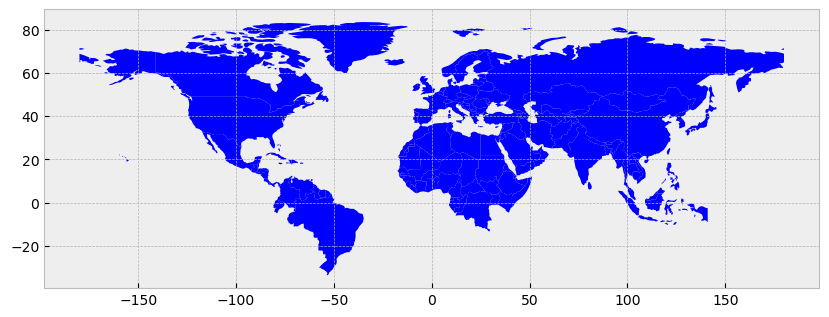

In [8]:
world = geopandas.read_file(r"../../pygis/data/110m_cultural.zip")
northern_world = world.cx[ : , 0: ]   # subsets all rows above 0 with a slice
northern_world.plot(figsize=(10, 5))
plt.show()

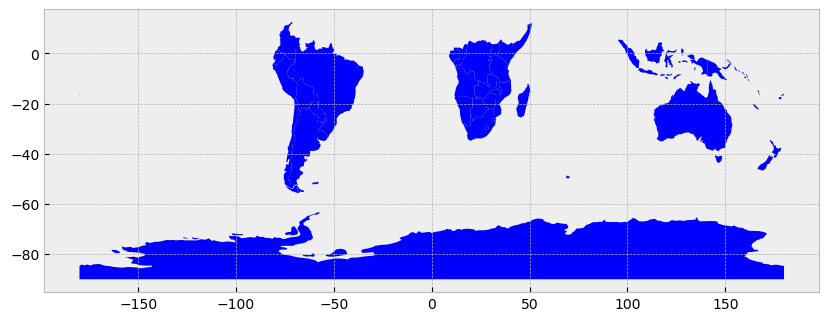

In [9]:
world = geopandas.read_file(r"../../pygis/data/110m_cultural.zip")
southern_world = world.cx[ : , :0 ]   # subsets all rows below 0  with a slice
southern_world.plot(figsize=(10, 5))
plt.show()